### Biblioteca

In [1]:
import numpy as np
from numpy import random
from numpy import array, zeros, exp, random, dot, shape, transpose, reshape, meshgrid, linspace, sqrt

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from LightPipes import *

import scipy
from scipy import special
from scipy import ndimage # for image loading/processing
import imageio.v3 as iio

from PIL import Image 
import PIL 

import tensorflow as tf
from keras_sequential_ascii import keras2ascii
from keras import optimizers
import keras.models as km
import keras.layers as kl

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import sleep

In [ ]:
############### Definindo as funções #################################
# some internal routines for plotting the network:
def apply_layer(y_in,w,b,activation):
    """
    Go from one layer to the next, given a 
    weight matrix w (shape [n_neurons_in,n_neurons_out])
    a bias vector b (length n_neurons_out)
    and the values of input neurons y_in 
    (shape [batchsize,n_neurons_in])
    
    returns the values of the output neurons in the next layer 
    (shape [batchsize, n_neurons_out])
    """
    # to understand the following line, watch the beginning of lecture 2
    z=np.dot(y_in,w)+b # batch processing: y_in is of shape [batchsize,num_neurons_in]
    if activation=='sigmoid':
        return(1/(1+np.exp(-z)))
    elif activation=='jump':
        return(np.array(z>0,dtype='float'))
    elif activation=='linear':
        return(z)
    elif activation=='reLU':
        return((z>0)*z)
    elif activation=='step':
        return((z>0)*1)

def apply_net(y_in,weights,biases,activations):
    """
    Apply a whole network of multiple layers
    """
    y=y_in
    for j in range(len(biases)):
        y=apply_layer(y,weights[j],biases[j],activations[j])
    return(y)

def step(x):
    return (x>0)*1


## AULA 1

### Simples (3 inputs, 0 Hidden, 2 outputs)

 3 input.

 0 hidden.

 2 output.

![png/nn.png](png/nn.png)

In [ ]:
w   = np.array([[-0.7, -0.6,  0.9], [-0.8, -0.7,  0.9]] )  
#                            w    [wights]  = [N_1, N_0] 2 linhas x 3 colunas 
x   = np.array([2,0,1])    #  data [data]  = [N_0, 1  ] 3 linhas x 1 colunas
b   = np.array([0.1,0.2])  # bias [bias]  = [N_1, 1  ] 2 linhas x 1 colunas

In [ ]:
w

$ w =
\begin{bmatrix} 
-0.7 & -0.6 &  0.9\\ -0.8 & -0.7 &  0.9
\end{bmatrix} \ [Dimensão] = [2,3]  $  ?

O número de COLUNAS é igual ao números de entradas!

O número de LINHA é igual ao número da proxima camada!  Nesse exemplo é  2(outputs)

$ b =
\begin{bmatrix} 
0.1 \\ 0.2
\end{bmatrix} \ [Dimensão] = [2,1]$

$ x =
\begin{bmatrix} 
1 \\ 0 \\ 1
\end{bmatrix} \ [Dimensão] = [3,1]$

In [ ]:
z = np.dot(w,x) + b # [N_1, N_0]*[N_0, 1 ] + [N_1]
y_out = 1/(1+np.exp(-z)) # the 'sigmoid' function (applied elementwise)

Fazendo o produto interno :

$ z = dot(w,x) +b\\
z =\begin{bmatrix} 
-0.7 & -0.6 &  0.9\\ -0.8 & -0.7 &  0.9
\end{bmatrix}*
\begin{bmatrix} 
1 \\ 0 \\ 1
\end{bmatrix}+
\begin{bmatrix} 
0.1 \\ 0.2
\end{bmatrix}\\
$
$z = 
\begin{bmatrix} 
0.2 \\ 0.1 
\end{bmatrix}+
\begin{bmatrix} 
0.1 \\ 0.2
\end{bmatrix}\\
z =  
\begin{bmatrix} 
0.3 \\ 0.3 
\end{bmatrix}
$


 Função de ativação:
\begin{equation}
y_{out} = f(z) =\frac{1}{1+e^{-z}}
\end{equation}



In [ ]:
print("Input y_in:", x)
print("Weights w:", w)
print("bias vector b:", b)
print("linear superposition z:", z)
print("Network output y_out:", y_out)

### NN (N inputs, 0 Hidden, M outputs)

Vou definir uma função para a rede neural:  

--> N inputs.

--> 0 Hidden.

--> M outputs.

In [ ]:
def NN(x,w,b):
  z = np.dot(w,x) + b   ## z = w1*x1  + w2*x1 + ...+ b
  x_out = 1/(1+np.exp(-z))
  return x_out

Agora vamos definir os weights->[M,N] e bias->[M,1].

In [ ]:
size_input  = 6
size_output = 1
w = np.random.random(size=size_input)
b = np.random.random(size=size_output)
print(w)
print(b)

$ w =
\begin{bmatrix} 
0.1 & -0.2 &  0.3 & -0.4 & -0.5 &  0.6
\end{bmatrix} \ [Dimensão] = [1,6]
$  

$ b =
\begin{bmatrix} 
1 
\end{bmatrix}       \ [Dimensão] = [1,1]
$  

Definir os dado de entrada.

In [ ]:
x = np.random.random(size=size_input) # Dados de input
NN(x,w,b)      # Rede neural

$ x =
\begin{bmatrix} 
1 \\ 2 \\ 3 \\ 4 \\ 5 \\ 6
\end{bmatrix} \ [Dimensão] = [6,1]$

$ z = dot(w,x) +b\\
z =
\begin{bmatrix} 
0.1 & -0.2 &  0.3 & -0.4 & -0.5 &  0.6
\end{bmatrix}*
\begin{bmatrix} 
1 \\ 2 \\ 3 \\ 4 \\ 5 \\ 6
\end{bmatrix}+
\begin{bmatrix} 
1 
\end{bmatrix}\\
z = 
\begin{bmatrix} 
??
\end{bmatrix}+
\begin{bmatrix} 
1
\end{bmatrix}\\
z =  
\begin{bmatrix} 
??
\end{bmatrix}
$

### NN  (2 inputs, 1 Hidden, 1 outputs)

In [ ]:
# criar um matriz
Y = np.zeros([50,50])
for i in range(50):
  for ii in range(50):
    x_0 = float(i)/50 -0.5
    x_1 = float(ii)/50 -0.5
    Y[i,ii] = NN([x_0,x_1,x_0,x_1,x_0,x_1],w,b)
plt.imshow(Y,cmap="jet")
plt.colorbar()
plt.show()

![png/nnh1.png](nnh1.png)

In [ ]:
def NN(x,w,b):
  z = np.dot(w,x) + b   ## z = w1*x1  + w2*x1 + ...+ b
  x_out = 1/(1+np.exp(-z))
  return x_out
def ap_NN(x):
  global w1,w2,b1,b2
  x1 = NN(x,w1,b1)
  x2 = NN(x1,w2,b2)
  return x2

In [ ]:
size_input  = 2
size_hidden = 5
size_output = 1

# primeira camada para hidden layer
w1 = np.random.uniform(size=(size_hidden,size_input)) 
b1= np.random.uniform(size=size_hidden)
print(" w =",w1,"\n b =",b1)

Matriz da primeira entrada 

$ w =
\begin{bmatrix} 
1 & 1  \\ 2 & 2 \\ 3 & 3 \\ 4 & 4 \\ 5 & 5 \\ 
\end{bmatrix}
$ O número de colunas é igual a entrada/input.
O número de linha e igual o tamanho da hidden layer/saida.

$ b =
\begin{bmatrix} 
0.1 \\ 0.2 \\ 0.3 \\ 0.4 \\ 0.5 \\ 
\end{bmatrix}
$
O número de linha é igual ao tamanho da camada, pois cada uma dessas camadas é um "neurônio"

$ z = dot(w,x) +b\\
z =
\begin{bmatrix} 
1 & 1  \\ 2 & 2 \\ 3 & 3 \\ 4 & 4 \\ 5 & 5 \\ 
\end{bmatrix}*
\begin{bmatrix} 
x1 \\ x2 
\end{bmatrix}+
\begin{bmatrix} 
0.1 \\ 0.2 \\ 0.3 \\ 0.4 \\ 0.5 \\  
\end{bmatrix}\\
z = 
\begin{bmatrix} 
1*x_1 + 1*x_2  \\ 2*x_1 + 2*x_2 \\ 3*x_1 + 3*x_2 \\ 4*x_1 + 4*x_2 \\ 5*x_1 + 5*x_2 
\end{bmatrix}+
\begin{bmatrix} 
0.1 \\ 0.2 \\ 0.3 \\ 0.4 \\ 0.5 \\ 
\end{bmatrix}\\
z =  
\begin{bmatrix} 
1*x_1 + 1*x_2+0.1 \\ ... \\ ... \\ ... \\ ... \\ 
\end{bmatrix}
$

Função de ativação:
\begin{equation}
y_{out} = f(z) =\frac{1}{1+e^{-z}}
\end{equation}

In [ ]:
# hidden layer para output
w2 = np.random.uniform(size=(size_output,size_hidden))
b2 = np.random.random(size=size_output)

In [ ]:
print(" w =",w2,"\n b =",b2)

Fazendo o produto interno :

$ z = dot(w_{2},y_{out}) +b_2\\
z =\begin{bmatrix} 
1 & 2 &  3 & 4 & 5 
\end{bmatrix}*
\begin{bmatrix} 
1 \\ 0 \\ 1 \\ 0 \\ 1
\end{bmatrix}+
\begin{bmatrix} 
0.1 
\end{bmatrix}\\
$
$z = 0.1+ 1*1 + 2*0 + 3*1+ 4*0 +5*1
$

In [ ]:

# Criar um matriz
Y = np.zeros([50,50])
for j1 in range(50):
  for j2 in range(50):
    value0 = float(j1)/50-0.5
    value1 = float(j2)/50-0.5
    Y[j1,j2] = ap_NN([value0,value1])
plt.imshow(Y,cmap="jet",extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.show()

### NN  (2 inputs, 5 Hidden, 1 outputs)

Para ilustrar usei apenas 2 inputs e 5 camadas ocultas e 1 output

![png/nnh5.png](png/nnh5.png)

In [ ]:
#Primeira hidden layer, deve ter o mesmo numero de linhas que da primeira camada 
input_size   = 2
N_h_layers   = 5 # not counting the input layer & the output layer
h_Layer_Size = 3
#Primeira hidden layer, deve ter o mesmo numero de linhas que da primeira camada 
WeightsFirst = np.random.uniform(size = [h_Layer_Size,input_size])
BiasesFirst  = np.random.uniform(size = h_Layer_Size )

In [ ]:
WeightsFirst

$ w =\begin{bmatrix} 
1 & 1 \\ 2 & 1 \\ 3 & 1 
\end{bmatrix}
b =
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.3
\end{bmatrix} \\
 z = dot(w,x) +b\\
z =
\begin{bmatrix} 
z_1 =1*x_1 + 1*x_2 + 0.1 \\ z_2= 2*x_1 + 1*x_2 +0.2 \\ z_3 = 3*x_1 + 1*x_2 +0.3 
\end{bmatrix}
$

In [ ]:
# Hidden layer
Weights = np.random.uniform(size=[N_h_layers, h_Layer_Size, h_Layer_Size]) # 5 camadas  com 3 neuronios. 
Biases  = np.random.uniform(high=1,size=[N_h_layers,h_Layer_Size]) #  20 camadas com 20 neuronios

In [ ]:
Weights

Matriz w :

Como o input é dois então a matriz w tera  2 colunas. 
Nesse caso, foi configurado para a matriz ter tamanho quadratico, significar que a linha e colunas são do mesmo tamanho.

Consequentemente temos 2 linhas.

$ w =\begin{bmatrix} 
\begin{bmatrix} 
1 & 1 & 1 \\ 2 & 1 & 1 \\ 3 & 1 & 1
\end{bmatrix}
\begin{bmatrix} 
2 & 2 & 2 \\ 1 & 1 & 1 \\ 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix} 
3 & 3 & 3 \\ 1 & 1 & 1 \\ 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix} 
4 & 4 & 4 \\ 1 & 1 & 1 \\ 1 & 1 & 1
\end{bmatrix}
\begin{bmatrix} 
5 & 5 & 5 \\ 1 & 1 & 1 \\ 1 & 1 & 1
\end{bmatrix}
\end{bmatrix}
$

Na verdade a matriz w agora é tridimensional, e cada elemento na 3° dimensão é uma hidden layer. 

Cada hidden layer tem 2 "neurônios' consequentemente terá duas bias, isso siginificar que cada matriz b tem dimensão [2 x 1]. 

$b =
\begin{bmatrix}
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.3
\end{bmatrix}
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.3
\end{bmatrix}
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.3
\end{bmatrix}
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.3
\end{bmatrix}
\begin{bmatrix}
0.1 \\ 0.2 \\ 0.3
\end{bmatrix}
\end{bmatrix}
$

$
z = dot(w,x) +b
$


$f(z) =
\begin{bmatrix}
f(z_1) \\ f(z_2)  \\ f(z_3) 
\end{bmatrix}
$

In [ ]:
# for the final layer (i.e. the output neuron)
WeightsFinal = np.random.uniform(size = [1,h_Layer_Size])
BiasesFinal  = np.random.uniform(high=1,size = 1)

In [ ]:
WeightsFinal

$ w =\begin{bmatrix} 
1 & 1 & 1  
\end{bmatrix};
b =
\begin{bmatrix}
0.1
\end{bmatrix} \\
 z = dot(w,x) +b\\
z =
1*x_1 + 1*x_2+1*x_3 + 0.1 
$

### Mudando a função de ativação

In [ ]:
x  = [[0,0],[1,1],[0,1],[1,0]]
w  = [[1,0],[0,1]]
b  = [0,0]
z = np.dot(x,w) + b 
print(x)

In [ ]:
x  = [1,-1]
w  = [[1,0],[0,1]]
b  = [0,0]
def Xor(x,w,b):
    z = np.dot(w,x) + b
    return(np.heaviside(z,0))
R = Xor(x,w,b)
print(Xor(x,w,b))



In [ ]:
### Exercicio
def NN(x,w,b):
  z = np.dot(w,x) + b   ## z = w1*x1  + w2*x1 + ...+ b
  x_out = 1/(1+np.exp(-z))
  return x_out

#######################################################
x  = np.linspace(-10,10,100)
y  = np.linspace(-10,10,100)
xx, yy = meshigrid(x,y)
w  = [[1,0],[0,1]]
b  = [0,0]
A  = NN(x,w,b)
#w1  = np.random.uniform(size = [o,i])
#b1  = np.random.uniform(size = o)

# AULA 2

### AND 

#### 1°

Network:

![png/AND.png](png/AND.png)

Porta AND :

The input of x_1 and x_2 will be binary 0 or 1 and the function f(z) will be representing AND gate. 

For this porpose, the weights will be specified.

$w =
\begin{bmatrix} 
1 \\ 1  
\end{bmatrix}
$
and 
$b =
\begin{bmatrix} 
-1
\end{bmatrix}
$


Calculationg z :

$ z = dot(x,w) +b. $ Observação para ordem trocada de x e w

$z =
\begin{bmatrix} 
x_1 & x_2 \\ 
\end{bmatrix}*
\begin{bmatrix} 
1 \\ 1 
\end{bmatrix}
+
\begin{bmatrix} 
-1
\end{bmatrix}\\
$
$z = 1*x_1 + 1*x_2 - 1
$

Then note :

If  $x_1$ = 0 and $x_2$ = 0, z = -1.

If  $x_1$ = 1 and $x_2$ = 0, z = 0.

If  $x_1$ = 0 and $x_2$ = 1, z = 0.

If  $x_1$ = 1 and $x_2$ = 1, z =  1.

Using the RElu activation function in f(z):

$$ y_{out} = f(z) =
\begin{cases} 
\text{ x , if x > 0 } \\ \text{ 0 , otherwise}
\end{cases}
$$ 

![png/RElu.png](png/RElu.png)



In [ ]:
# Criando um vetor x:
x = [[0,0],[0,1],[1,0],[1,1]]
#print(x)
w = [1,1]
b = [-1]

z = apply_layer(x,w,b,'reLU')
print(x)

$x =
\begin{bmatrix} 
0 & 0 \\ 
0 & 1 \\
1 & 0 \\
1 & 1 
\end{bmatrix}
; w = 
\begin{bmatrix} 
1 \\ 1 
\end{bmatrix}
; b =
\begin{bmatrix} 
-1
\end{bmatrix}
$

Criamos um batch de com as 4 possivies entradas, onde entraremos na rede uma linha por vez primeira coluna representa x_1 e a segunda x_2.

In [ ]:
# visualizar os resultados quandos os resultados são discretos 
M  = [[0,1],[0,1]]
ii = 0
for i in range(2):
    for j in range(2):
        M[i][j] = z[ii]
        ii+=1

MM = np.random.randn(2,2)
plt.spy(M,origin='lower')
plt.colorbar()
plt.show()

#### 2° Continuo

Vamos contruir um grafico continuo 

![png/AND2.png](png/AND2.png)

Now x_1 and x_2 will be between -1 to 1, and the first f(z) will be step function them the rest will be the same.

In [ ]:
x = np.arange(-10,10+1,1)/10
X = []
for ii in Mx[0]:
    X.append(step(ii))
plt.plot(x,X,"o")
plt.show()
x      = np.arange(-10,10+1,1)/10
Mx,My  = np.meshgrid( x,x)
i      = 0
for ii in Mx[0]:
    j = 0
    for jj in Mx[0]:
        My[i][j] = step(ii +jj)
        j+=1
    i+=1
plt.spy(My)
plt.colorbar()
plt.show()

In [ ]:
# Criando um vetor x:
x = np.arange(-100,100+1,1)/100
w = [1,1]
b = [-1]
z = []

Mx,My  = np.meshgrid(x,x)

ii = 0
for i in x:
    jj = 0
    for j in x :
        a =  int(apply_layer([step(i),step(j)],w,b,'reLU') )
        z.append( a )
        My[ii][jj] = a
        jj+=1
    ii+=1
plt.spy(My,origin='lower')
plt.colorbar()
plt.show()

#### Usando os camando dos FLORIAN M. para visualizar.

In [ ]:
def apply_layer(y_in,w,b,activation):
    """
    Go from one layer to the next, given a 
    weight matrix w (shape [n_neurons_in,n_neurons_out])
    a bias vector b (length n_neurons_out)
    and the values of input neurons y_in 
    (shape [batchsize,n_neurons_in])
    
    returns the values of the output neurons in the next layer 
    (shape [batchsize, n_neurons_out])
    """
    # to understand the following line, watch the beginning of lecture 2
    z=np.dot(y_in,w)+b # batch processing: y_in is of shape [batchsize,num_neurons_in]
    if activation=='sigmoid':
        return(1/(1+np.exp(-z)))
    elif activation=='jump':
        return(np.array(z>0,dtype='float'))
    elif activation=='linear':
        return(z)
    elif activation=='reLU':
        return((z>0)*z)
    elif activation=='step':
        return((z>0)*1)


def apply_net(y_in,weights,biases,activations):
    """
    Apply a whole network of multiple layers
    """
    y=y_in
    for j in range(len(biases)):
        y=apply_layer(y,weights[j],biases[j],activations[j])
    return(y)

# some internal routines for plotting the network:
def plot_connection_line(ax,X,Y,W,vmax=1.0,linewidth=3):
    t=np.linspace(0,1,20)
    if W>0:
        col=[0,0.4,0.8]
    else:
        col=[1,0.3,0]
    ax.plot(X[0]+(3*t**2-2*t**3)*(X[1]-X[0]),Y[0]+t*(Y[1]-Y[0]),
           alpha=abs(W)/vmax,color=col,
           linewidth=linewidth)
    
def plot_neuron_alpha(ax,X,Y,B,size=100.0,vmax=1.0):
    if B>0:
        col=[0,0.4,0.8]
    else:
        col=[1,0.3,0]
    ax.scatter([X],[Y],marker='o',c=col,alpha=abs(B)/vmax,s=size,zorder=10)

def plot_neuron(ax,X,Y,B,size=100.0,vmax=1.0):
    if B>0:
        col=[0,0.4,0.8]
    else:
        col=[1,0.3,0]
    ax.scatter([X],[Y],marker='o',c=col,s=size,zorder=10)
    
def visualize_network(weights,biases,activations,
                      M=100,y0range=[-1,1],y1range=[-1,1],
                     size=400.0, linewidth=5.0):
    """
    Visualize a neural network with 2 input 
    neurons and 1 output neuron (plot output vs input in a 2D plot)
    
    weights is a list of the weight matrices for the
    layers, where weights[j] is the matrix for the connections
    from layer j to layer j+1 (where j==0 is the input)
    
    weights[j][m,k] is the weight for input neuron k going to output neuron m
    (note: internally, m and k are swapped, see the explanation of
    batch processing in lecture 2)
    
    biases[j] is the vector of bias values for obtaining the neurons in layer j+1
    biases[j][k] is the bias for neuron k in layer j+1
    
    activations is a list of the activation functions for
    the different layers: choose 'linear','sigmoid',
    'jump' (i.e. step-function), and 'reLU'
    
    M is the resolution (MxM grid)
    
    y0range is the range of y0 neuron values (horizontal axis)
    y1range is the range of y1 neuron values (vertical axis)
    """
    swapped_weights=[]
    for j in range(len(weights)):
        swapped_weights.append(np.transpose(weights[j]))
        
    y0,y1=np.meshgrid(np.linspace(y0range[0],y0range[1],M),np.linspace(y1range[0],y1range[1],M))
    y_in=np.zeros([M*M,2])
    y_in[:,0]=y0.flatten()
    y_in[:,1]=y1.flatten()
    y_out=apply_net(y_in,swapped_weights,biases,activations)

    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,4))
    
    # plot the network itself:
    
    # positions of neurons on plot:
    posX=[[-0.5,+0.5]]; posY=[[0,0]]
    vmax=0.0 # for finding the maximum weight
    vmaxB=0.0 # for maximum bias
    for j in range(len(biases)):
        n_neurons=len(biases[j])
        posX.append(np.array(range(n_neurons))-0.5*(n_neurons-1))
        posY.append(np.full(n_neurons,j+1))
        vmax=np.maximum(vmax,np.max(np.abs(weights[j])))
        vmaxB=np.maximum(vmaxB,np.max(np.abs(biases[j])))

    # plot connections
    for j in range(len(biases)):
        for k in range(len(posX[j])):
            for m in range(len(posX[j+1])):
                plot_connection_line(ax[0],[posX[j][k],posX[j+1][m]],
                                     [posY[j][k],posY[j+1][m]],
                                     swapped_weights[j][k,m],vmax=vmax,
                                    linewidth=linewidth)
    
    # plot neurons
    for k in range(len(posX[0])): # input neurons (have no bias!)
        plot_neuron(ax[0],posX[0][k],posY[0][k],
                   vmaxB,vmax=vmaxB,size=size)
    for j in range(len(biases)): # all other neurons
        for k in range(len(posX[j+1])):
            plot_neuron(ax[0],posX[j+1][k],posY[j+1][k],
                       biases[j][k],vmax=vmaxB,size=size)
    
    ax[0].axis('off')
    
    # now: the output of the network
    img=ax[1].imshow(np.reshape(y_out,[M,M]),origin='lower',
                    extent=[y0range[0],y0range[1],y1range[0],y1range[1]])
    ax[1].set_xlabel(r'$y_0$')
    ax[1].set_ylabel(r'$y_1$')
    
    axins1 = inset_axes(ax[1],
                    width="40%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='upper right')

    imgmin=np.min(y_out)
    imgmax=np.max(y_out)
    color_bar=fig.colorbar(img, cax=axins1, orientation="horizontal",ticks=np.linspace(imgmin,imgmax,3))
    cbxtick_obj = plt.getp(color_bar.ax.axes, 'xticklabels')
    plt.setp(cbxtick_obj, color="white")
    axins1.xaxis.set_ticks_position("bottom")

    plt.show()

In [ ]:
visualize_network(weights=[ [ [1,1] ] ], biases=[ [-1] ], activations=['step'],  y0range=[-1,1],y1range=[-1,1])

### NAND

Network:

![png/AND2.png](png/AND2.png)

Now x_1 and x_2 will be between -1 to 1, and the first f(z) will be step function them the rest will be the same.

For this porpose, the weights will be specified.

$w =
\begin{bmatrix} 
-0.5 \\ -0.5 
\end{bmatrix}
$
and 
$b =
\begin{bmatrix} 
1
\end{bmatrix}
$

Calculationg z :

$ z = dot(x,w) +b. $ Observação para ordem trocada de x e w

$z =
\begin{bmatrix} 
x_1 & x_2 \\ 
\end{bmatrix}*
\begin{bmatrix} 
-0.5 \\ -0.5 
\end{bmatrix}
+
\begin{bmatrix} 
1
\end{bmatrix}\\
$
$z = -0.5*x_1 + -0.5*x_2 + 1
$

Then note :

If  $x_1$ = 0 and $x_2$ = 0, z = 1.

If  $x_1$ = 1 and $x_2$ = 0, z = 0.5.

If  $x_1$ = 0 and $x_2$ = 1, z = 0.5.

If  $x_1$ = 1 and $x_2$ = 1, z = 0.

Using the step activation function in f(z):

$$ y_{out} = f(z) =
\begin{cases} 
\text{ 1 , if x > 0 } \\ \text{ 0 , otherwise}
\end{cases}
$$ 

In [ ]:
# Criando um vetor x:
x = np.arange(-100,100+1,1)/100
w = [-0.5,-0.5]
b = [1]
z = []

Mx,My  = np.meshgrid(x,x)

ii = 0
for i in x:
    jj = 0
    for j in x :
        a =  int(apply_layer([step(i),step(j)],w,b,'step') )
        z.append( a )
        My[ii][jj] = a
        jj+=1
    ii+=1
plt.spy(My,origin='lower')
plt.colorbar()
plt.show()

### OR

Network:

![png/AND2.png](png/AND2.png)

Now x_1 and x_2 will be between -1 to 1, and the first f(z) will be step function them the rest will be the same.

For this porpose, the weights will be specified.

$w =
\begin{bmatrix} 
0.5 \\ 0.5
\end{bmatrix}
$
and 
$b =
\begin{bmatrix} 
0
\end{bmatrix}
$

Calculationg z :

$ z = dot(x,w) +b. $ Observação para ordem trocada de x e w

$z =
\begin{bmatrix} 
x_1 & x_2 \\ 
\end{bmatrix}*
\begin{bmatrix} 
0.5 \\ 0.5
\end{bmatrix}
+
\begin{bmatrix} 
0
\end{bmatrix}\\
$
$z = 0.5*x_1 +0.5*x_2 + 0
$

Then note :

If  $x_1$ = 0 and $x_2$ = 0, z = 0.

If  $x_1$ = 1 and $x_2$ = 0, z = 0.5.

If  $x_1$ = 0 and $x_2$ = 1, z = 0.5.

If  $x_1$ = 1 and $x_2$ = 1, z = 1.

Using the step activation function in f(z):

In [ ]:
# Criando um vetor x:
x = np.arange(-100,100+1,1)/100
w = [0.5,0.5]
b = [0]
z = []

Mx,My  = np.meshgrid(x,x)

ii = 0
for i in x:
    jj = 0
    for j in x :
        a =  int(apply_layer([step(i),step(j)],w,b,'step') )
        z.append( a )
        My[ii][jj] = a
        jj+=1
    ii+=1
plt.spy(My,origin='lower')
plt.colorbar()
plt.show()

### NOR

Network:

![png/AND2.png](png/AND2.png)

Now x_1 and x_2 will be between -1 to 1, and the first f(z) will be step function them the rest will be the same.

For this porpose, the weights will be specified.

$w =
\begin{bmatrix} 
-0.5 \\ -0.5
\end{bmatrix}
$
and 
$b =
\begin{bmatrix} 
0.5
\end{bmatrix}
$

Calculationg z :

$ z = dot(x,w) +b. $ Observação para ordem trocada de x e w

$z =
\begin{bmatrix} 
x_1 & x_2 \\ 
\end{bmatrix}*
\begin{bmatrix} 
-0.5 \\ -0.5
\end{bmatrix}
+
\begin{bmatrix} 
0.5
\end{bmatrix}\\
$
$z = -0.5*x_1 -0.5*x_2 + 0.5
$

Then note :

If  $x_1$ = 0 and $x_2$ = 0, z = 0.5.

If  $x_1$ = 1 and $x_2$ = 0, z = 0.

If  $x_1$ = 0 and $x_2$ = 1, z = 0.

If  $x_1$ = 1 and $x_2$ = 1, z = -0.5.

Using the step activation function in f(z):

In [ ]:
# Criando um vetor x:
x = np.arange(-100,100+1,1)/100
w = [-0.5,-0.5]
b = [0.5]
z = []

Mx,My  = np.meshgrid(x,x)

ii = 0
for i in x:
    jj = 0
    for j in x :
        a =  int(apply_layer([step(i),step(j)],w,b,'step') )
        z.append( a )
        My[ii][jj] = a
        jj+=1
    ii+=1
plt.spy(My,origin='lower')
plt.colorbar()
plt.show()

### XOR

Network:

![png/XOR.png](png/XOR.png)

The input of x_1 and x_2 will be binary 0 or 1 . In this neural network it was necessary to implement a hidden layer, beacause we need the non-linearity.

Porta NOR :
$$w =
\begin{bmatrix} 
-0.5 \\ -0.5
\end{bmatrix}
\text{and } 
b =
\begin{bmatrix} 
0.5
\end{bmatrix}
$$

 $$ z = dot(x,w) +b. = -0.5*x_1 -0.5*x_2 + 0.5$$

Them note :

If  $x_1$ = 0 and $x_2$ = 0, z = 0.5;

If  $x_1$ = 1 and $x_2$ = 0, z = 0;

If  $x_1$ = 0 and $x_2$ = 1, z = 0;

If  $x_1$ = 1 and $x_2$ = 1, z = -0.5.


Porta AND :

$$ w =
\begin{bmatrix} 
1 \\ 1  
\end{bmatrix}
\text{and }
b =
\begin{bmatrix} 
-1
\end{bmatrix}
$$

$$ z = dot(x,w) +b = 1*x_1 + 1*x_2 - 1$$

Them note :

If  $x_1$ = 0 and $x_2$ = 0, z = -1.

If  $x_1$ = 1 and $x_2$ = 0, z = 0.

If  $x_1$ = 0 and $x_2$ = 1, z = 0.

If  $x_1$ = 1 and $x_2$ = 1, z =  1.



### back

# Aula 3

## Manualmente :

### 1° Caso 

In [ ]:
w   = np.array([[-0.7, -0.6,  0.9], [-0.8, -0.7,  0.9]] )  
#                            w    [wights]  = [N_1, N_0] 2 linhas x 3 colunas 
x   = np.array([1,0,1])    #  data [data]  = [N_0, 1  ] 3 linhas x 1 colunas
b   = np.array([0.1,0.2]) 
z = np.dot(w,x) + b # [N_1, N_0]*[N_0, 1 ] + [N_1]
y_out = 1/(1+np.exp(-z)) 
y_out

![png/nn.png](png/nn.png)

Backpropagation:

Queremos a parte do erro ajustar os pesos e biases w e b, e assim obter um fit melhor.

$$
Erro= C =\frac{1}{2} \sum^N_i \frac{(y_{i} - Y_{i})^2}{N}
$$
Y_{i} é a variavel target ou rótulo.
Para isso calcular o gradiente com relação aos peso e biases.

$$
w^* = w^* - \eta \nabla C \\
b^* = b^* - \eta \nabla C 
$$
$\eta$ representa a taxa de aprendizado. Estou usando o sub-indice "*" para identificar que o calculo será realizado para um peso e biases especifico.

Vamos ilustar para o caso com $w^* =w_1$,
$${\color{yellow}
w_1} = w_1 - \eta {\color{green}\frac{dC}{dw_1} \\
}
$$

Calcualndo a derivada separadamente :

$$
\frac{dC}{dw_1} =\frac{1}{2} \sum^N_i   \frac{d }{dw_1}(y_{i} - Y_{i})^2  
$$
$$ \frac{dC}{dw_1} = \sum^N_i  \frac{(y_{i} - Y_{i})}{N}\frac{dy_{out}^{'} }{dw_1} $$

Para essa rede neural espeficicada acima temos duas saidas, portanto y_out tem duas componente :
$$ \frac{dC}{dw_1} = \frac{(y_{1} - Y_{1})}{2} \frac{d \sigma(z_1)^{'} }{dw_1} + \frac{(y_{2} - Y_{2})}{2} \frac{d \sigma(z_2)^{'} }{dw_1} $$
$$ \frac{dC}{dw_1} = \frac{(y_{1} - Y_{1})}{2}\sigma(z_1)^{'}\frac{d z_1 }{dw_1} + \frac{(y_{2} - Y_{2})}{2}\sigma(z_2)^{'}\frac{d z_2 }{dw_1} $$
$$ \frac{dC}{dw_1} =  \Delta^0_1\frac{d z_1 }{dw_1}  + \Delta^0_2\frac{d z_2 }{dw_1}  $$
$$ \frac{dC}{dw_1} =  \Delta^0_1x_1   + \Delta^0_2 0  $$
$$ \frac{dC}{dw_1} =  \Delta^0_1x_1 $$


Matricial,

$$
\frac{dC}{dw_1} =
\begin{bmatrix}
\Delta^0_1 & \Delta^0_2 
\end{bmatrix}
\begin{bmatrix}
x_1 \\ 0
\end{bmatrix}
$$

$$
\frac{dC}{dw_1} =\Delta^0x_1
$$

$${\color{yellow} w_1 = w_1 - \eta \Delta^0x_1 }$$


In [ ]:
y_target = [1,0]
df_layer =  np.exp(-z)*(y_out**2)
print('y_target',y_target)
print('df_layer',df_layer)

In [ ]:
delta = (y_out - y_target)*df_layer
delta

Agora :
$$
\Delta^0x_1
$$

In [ ]:
dw_layer = delta[0]*x[0]
dw_layer

$${\color{yellow} w_1 }= w_1 - \eta \Delta^1 x_1 $$
Vamos considerar a taca de aprendendizado igual 0.5

In [ ]:
eta = 0.5 
w[0,0] = w[0,0]  - eta*dw_layer
w[0,0]

Podemos fazer o mesmo para o biases :
.

$$
C =\frac{1}{2} \sum^N_i \frac{(y_{i} - Y_{i})^2}{N}
$$
$$ b^* = b^* - \eta \nabla C  $$

Vamos ilustar para o caso com $b^* =b_1$,
$${\color{yellow} b_1} = b_1 - \eta {\color{green}\frac{dC}{db_1} }
$$

Para essa rede neural espeficicada acima temos duas saidas, portanto y tem duas componente :
$$ \frac{dC}{db_1} = \frac{(y_{1} - Y_{1})}{2} \frac{d \sigma(z_1)^{'} }{db_1} + \frac{(y_{2} - Y_{2})}{2} \frac{d \sigma(z_2)^{'} }{db_1} $$
$$ \frac{dC}{db_1} = \frac{(y_{1} - Y_{1})}{2}\sigma(z_1)^{'}\frac{d z_1 }{db_1} + \frac{(y_{2} - Y_{2})}{2}\sigma(z_2)^{'}\frac{d z_2 }{db_1} $$
$$ \frac{dC}{db_1} = \Delta^0_1\frac{d z_1 }{db_1}  + \Delta^0_2\frac{d z_2 }{db_1}  $$
$$ \frac{dC}{db1} =  \Delta^0_1 1   + \Delta^0_2 0  $$
$$ \frac{dC}{db_1} = \Delta^0_1 $$
$$ \frac{dC}{dw_1} =\Delta^0x_1 $$
$${\color{yellow} b_1 = b_1 - \eta \Delta^0 }$$


In [ ]:
b

In [ ]:
db_layer = delta[0]
b[0] = b[0]  - eta*dw_layer
b[0]

Vamos automatizar o processo :

In [ ]:
w   = np.array([[-0.7, -0.6,  0.9], [-0.8, -0.7,  0.9]] )  
x   = np.array([1,0,1])    #  data [data]  = [N_0, 1  ] 3 linhas x 1 colunas
b   = np.array([0.1,0.2]) 
eta = 0.01 
plot_erro = []
erro =100
while(erro>0.0001):
    z        = np.dot(w,x) + b 
    y_out    = 1/(1+np.exp(-z)) 

    df_layer =  np.exp(-z)*(y_out**2)
    delta    = (y_out - y_target)*df_layer

    dw_layer = delta[0]*x[0]
    w[0,0]   = w[0,0]  - eta*dw_layer
    db_layer = delta[0]
    b[0]     = b[0]  - eta*dw_layer

    erro     = abs(y_out[0] - y_target[0])**2/2    #sum(y_out[] - y_target[])
    #print(erro)
    plot_erro.append(erro)


In [ ]:
plt.plot(plot_erro)
plt.show()
plot_erro[-1]

### 2° caso 

Vou definir uma função para a rede neural:  

--> N inputs.

--> 0 Hidden.

--> M outputs.

In [ ]:
def NN(x,w,b):
  z = np.dot(w,x) + b   ## z = w1*x1  + w2*x1 + ...+ b
  x_out = 1/(1+np.exp(-z))
  return(x_out,np.exp(-z)*(x_out**2) )

In [ ]:
size_input  = 6
size_output = 1
w = np.random.random(size=size_input)
b = np.random.random(size=size_output)
print('w:',w)
print('b:',b)

In [ ]:
x = np.random.random(size=size_input) # Dados de input
print('x',x)

In [ ]:
results =NN(x,w,b) 
results

In [ ]:
print(results[0], results[1])        # Rede neural

In [ ]:
y_out    = results[0]
df_layer = results[1]
y_target = [13]  
delta    = (y_out - y_target)*df_layer
delta

Note que a rede acima retorna o valor da função e da derivada. Fazer o calculo da derivada durante a propagação é mais eficiente.

AGORA-->>Vamos fazer nossa rede com 6 inputs ser treinada para aprender esse conjunto de dados :

$$y = [0,1,2,3,4,5]$$

In [ ]:
size_input  = 6
size_output = 1
y = [0,1,2,3,4,5]                     # Target
x = np.random.random(size=size_input) # Dados de input
w = np.random.random(size=size_input)
b = np.random.random(size=size_output)
eta = 0.01 
plot_erro = []
erro =100 # Valor escolhido apenas para iniciar o loop
while(erro>0.001):
    Rede_neural = NN(x,w,b)  
        
    y_out    = Rede_neural[0]
    df_layer = Rede_neural[1]
        
    delta    = (y_out - y_target)*df_layer
    dw_layer = delta[0]*x[0]      # continuo ajustando apenas um peso
    w        = w  - eta*dw_layer
    db_layer = delta           # continuo ajustando apenas um biases
    b        = b  - eta*dw_layer

    erro     = abs(y_out[0] - y[0])**2/2    #sum(y_out[] - y_target[])
    #print(erro)
    plot_erro.append(erro)


In [ ]:
plt.plot(plot_erro)
plt.show()
plot_erro[-1]


### 3°

Aprendemos a fazer o backpropagatioin com apenas um peso. Nosso objetivo é atualizar varios pesos ao mesmo tempo.


#### 3.1 propagation

Definindo a funções para realizar propagation:

    Para facilitar vamos deficir x,w e b,numero_layer como uma variavel global.

In [ ]:
def forward_step(y,w,b): # calculate values in next layer, from input y
    z = np.dot(y,w) + b 
    x_out = 1/(1+np.exp(-z))    
    return(x_out,np.exp(-z)*(x_out**2)) # apply nonlinearity and return result

def apply_net(x): # one forward pass through the network
    global W, B, NumLayers
    global y_layer, df_layer # for storing y-values and df/dz values
    
    y = x # start with input values
    y_layer[0]=y
    for j in range(NumLayers): # loop through all layers
        # j=0 corresponds to the first layer above the input
        y,df = forward_step(y,W[j],B[j]) # one step
        df_layer[j] = df # store f'(z) [needed later in backprop]
        y_layer[j+1] = y # store f(z) [also needed in backprop]        
    return(y)

In [ ]:
from numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, linspace, transpose
                                                                            # Definindo os pesos os pesos e biases.
NumLayers = 1                                                               # Não conta com  input-layer.
LayerSizes=[3,2]  #1° INPUT, 2° OUTPUT                                              
                                                                            # Criando e Ininicalizando os pesos e biases. 
                                                                            # De acordo com o numero de layer e os tamanhos(quantidade de neurônio).
W=[random.uniform(low=-1,high=+1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
B=[random.uniform(low=-1,high=+1,size=LayerSizes[j+1]) for j in range(NumLayers)]
batchsize=1                                                                 # Define the batchsize.
                                                                            # Vamos definir o tamanho das outra variaveis que prescisamos:
y_layer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)]
df_layer=[zeros([batchsize,LayerSizes[j+1]]) for j in range(NumLayers)]
dw_layer=[zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

In [ ]:
x = random.uniform(low=-1,high=+1,size=[batchsize,LayerSizes[0]])
    # Note que o tamanho da variavel de entrada está defininda ( battch =1 )x( Primeria camada = 1 )
print('input :',x)
y_target= [1,0]   #random.uniform(low=-1,high=+1,size=[batchsize,LayerSizes[-1]])
    # Note que o tamanho do targete esta definindo ( battch =1 )x( ultima camada = 1 )
print('y_target:',y_target)

In [ ]:
A = apply_net(x) ## Esse metodo me retorna o resultado da rede
A


#### 3.2 Backpropagation

In [ ]:
y_layer

    1° TERMO É O INPUT .
    O ultimo termo de y_layer é justamente o output

In [ ]:
df_layer

In [ ]:
# vamos corrigir os valor de saida com o gradiente 
delta = (y_layer[-1]-y_target)*df_layer[-1]
delta

In [ ]:
y_layer[-2]

In [ ]:
dw_layer[-1]=  dot(transpose(y_layer[-2]),delta)/batchsize
db_layer[-1]= delta.sum(0)/batchsize
print('dw_layer:\n',dw_layer)
print('db_layer:\n',db_layer)

Calculamos todas os termo da backpropagation, agora é ajusatar 

In [ ]:
dw_layer[0]

In [ ]:
eta= 0.01

In [ ]:
W[0]-eta*dw_layer[0] # o indice indica qual a camada que estamo operando 

Agora é aplica esse calculo na matriz gloval W e B para podemos refazer a propagação, para cada camada.

In [ ]:
for j in range(NumLayers):
    W[j]-=eta*dw_layer[j]
    B[j]-=eta*db_layer[j]

End, agora é fazer a propagação e repetir todo o procesos.

Portando iremos automazitar esses passos.

### 4º

Definindo funções para realizar backpropagation

In [ ]:
#################################  PROPAGAÇÃO ##############################################
def forward_step(y,W,B):                # calculate values in next layer, from input y
    z = np.dot(y,W) + B 
    y_out = 1/(1+np.exp(-z))    
    return(y_out,np.exp(-z)*(y_out**2))  # apply nonlinearity and return result

def apply_net(x):                        # one forward pass through the network
    global W, B, NumLayers
    global y_layer, df_layer             # for storing y-values and df/dz values
    
    y = x                                # start with input values
    y_layer[0]=y
    for j in range(NumLayers): 

        y,df = forward_step(y,W[j],B[j]) # one step
        df_layer[j] = df                 # store f'(z) [needed later in backprop]
        y_layer[j+1] = y                 # store f(z) [also needed in backprop]        
    return(y)

################################# BACK-PROPAGATION ##########################################
def backprop(y_target):
    
    global y_layer, df_layer, W, B, NumLayers
    global dw_layer, db_layer           # dCost/dw and dCost/db (w,b=weights,biases)
    global batchsize
    
    delta = (y_layer[-1]-y_target)*df_layer[-1]
    dw_layer[-1] = dot(transpose(y_layer[-2]),delta)/batchsize
    db_layer[-1] = delta.sum(0)/batchsize
    
    for j in range(NumLayers-1):
        delta          = dot(delta,transpose(W[-1-j]))*df_layer[-2-j]           
        dw_layer[-2-j] = dot(transpose(y_layer[-3-j]),delta)
        db_layer[-2-j] = delta.sum(0)/batchsize

def gradient_step(eta): # update weights & biases (after backprop!)
    global dw_layer, db_layer, W, B
    
    for j in range(NumLayers):
        W[j]-=eta*dw_layer[j]
        B[j]-=eta*db_layer[j]      
        

In [ ]:
NumLayers  = 3                                                               # CAMDAS 
LayerSizes = [4,4,4,2]                                                       #1° INPUT, 2° HIDDENLAYER, 3° OUTPUT                                              
batchsize  = 1                                                               # Define the batchsize.
eta        = 0.1
W = [random.uniform(low=-1,high=+1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
B = [random.uniform(low=-1,high=+1,size=LayerSizes[j+1]) for j in range(NumLayers)]
x = random.uniform(low=-1,high=+1,size=[batchsize,LayerSizes[0]])

y_layer =[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)]
df_layer=[zeros([batchsize,LayerSizes[j+1]]) for j in range(NumLayers)]
dw_layer=[zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]
y_target=[np.arange(LayerSizes[-1])] 

In [ ]:
y_out_result = apply_net(x)
backprop(y_target)
gradient_step(eta)
cost = ((y_target-y_out_result)**2).sum()/batchsize
print(cost)

Vamos realizar um loop:

In [ ]:
cost=1
CCC =[]
while(cost>0.001):
    y_out_result = apply_net(x)
    backprop(y_target)
    gradient_step(eta)
    cost = ((y_target-y_out_result)**2).sum()/batchsize
    CCC.append(cost)

In [ ]:
plt.plot(CCC)

## AUTOMATIZAR TUDO !

### With keras

In [ ]:
#################################  PROPAGAÇÃO ##############################################
def forward_step(y,Weights,B):                # calculate values in next layer, from input y
    z = np.dot(y,Weights) + B 
    y_out = 1/(1+np.exp(-z))    
    return(y_out,np.exp(-z)*(y_out**2))  # apply nonlinearity and return result

def apply_net(y_in):                        # one forward pass through the network
    global Weights, B, NumLayers
    global y_layer, df_layer             # for storing y-values and df/dz values
    y = y_in
    y_layer[0]=y
    for j in range(NumLayers): 

        y,df = forward_step(y,Weights[j],B[j]) # one step
        df_layer[j]  = df                 # store f'(z) [needed later in backprop]
        y_layer[j+1] = y                 # store f(z) [also needed in backprop]        
    return(y)

def apply_net_simple(y_in): # one forward pass through the network
    # no storage for backprop (this is used for simple tests)

    y=y_in # start with input values
    y_layer[0]=y
    for j in range(NumLayers): # loop through all layers
        # j=0 corresponds to the first layer above the input
        y,df=forward_step(y,Weights[j],B[j]) # one step
    return(y)
################################# BACK-PROPAGATION ##########################################
def backprop(y_target):
    
    global y_layer, df_layer, Weights, B, NumLayers
    global dw_layer, db_layer           # dCost/dw and dCost/db (w,b=weights,biases)
    global batchsize
    
    delta = (y_layer[-1]-y_target)*df_layer[-1]
    dw_layer[-1] = np.dot(np.transpose(y_layer[-2]),delta)/batchsize
    db_layer[-1] = delta.sum(0)/batchsize
    
    for j in range(NumLayers-1):
        delta          = np.dot(delta,np.transpose(Weights[-1-j]))*df_layer[-2-j]           
        dw_layer[-2-j] = np.dot(np.transpose(y_layer[-3-j]),delta)
        db_layer[-2-j] = delta.sum(0)/batchsize

def gradient_step(eta): # update weights & biases (after backprop!)
    global dw_layer, db_layer, W, B
    
    for j in range(NumLayers):
        Weights[j]-=eta*dw_layer[j]
        B[j]-=eta*db_layer[j]      
        
def train_net(y_in,y_target,eta): 

    global y_out_result
    
    y_out_result=apply_net(y_in)
    backprop(y_target)
    gradient_step(eta)
    cost=((y_target-y_out_result)**2).sum()/batchsize
    return(cost)  

In [ ]:
NumLayers  = 5                                                               # CAMDAS 
LayerSizes = [2,30,30,30,30,1]                                          #1° INPUT, 2° HIDDENLAYER, 3° OUTPUT                                              
batchsize  = 1000                                                               # Define the batchsize.
eta        = 0.01
Weights = [np.random.uniform(low=-1,high=+1,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
B = [np.random.uniform(low=-1,high=+1,size=LayerSizes[j+1]) for j in range(NumLayers)]
x = np.random.uniform(low=-1,high=+1,size=[batchsize,LayerSizes[0]])

y_layer =[np.zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)]
df_layer=[np.zeros([batchsize,LayerSizes[j+1]]) for j in range(NumLayers)]
dw_layer=[np.zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer=[np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]
y_target=[np.arange(LayerSizes[-1])] 

#### Vamos contruir um função 2D target:

In [ ]:
def myFunc2(x0,x1):
  P = 0
  L = 0
  
  # Parâmetros do feixe TGSM
  lambd = 780*nm        # light wavelength
  sigma = .1*mm         # largura
  delta = .02*mm         # comprimento de coerência
  mu    = .001/mm         # fator de twist
  n     = 2**7
  dx    = 4*um  

  xx   = x0*dx
  yy   = x1*dx
  
  k = 2*np.pi/lambd
  a = 1/(4*sigma**2) # [L]^-2
  b = 1/(2*delta**2) # [L]^-2
  t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
  auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
  w0 = np.sqrt(2/auxNum) # [L], always positive
  chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
  
  z_R  = np.pi*w0**2/lambd  
  r    = np.sqrt(xx**2+yy**2)                                                 
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))
  PL   = scipy.special.assoc_laguerre(2*r**2/w0**2,P,abs(L))

  Fase = np.exp(- 1j*L*np.arctan2(yy,xx) )
  LG   = C*1/w0*(r*np.sqrt(2)/w0)**abs(L)*PL*np.exp( -r**2/w0**2)*Fase
  I_LG = abs(LG)**2
  I_LG = I_LG/I_LG.max()  
  return(I_LG )
   
def make_batch():
    global batchsize

    inputs  = np.random.randint(2**7,size=[batchsize,2])
    targets = np.zeros([batchsize,1]) # must have right dimensions
    targets[:,0]= myFunc2(inputs[:,0],inputs[:,1])
    return(inputs,targets)

#### Resto

In [ ]:
xrange = np.linspace(-64,64,2**7)
X0,X1  = np.meshgrid(xrange,xrange)

plt.imshow(myFunc2(X0,X1),cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
test_batchsize = np.shape(X0)[0]*np.shape(X0)[1] # Estou pegando o número de colunas vezes o números de linhas.
testsample     = np.zeros([test_batchsize,2])       # Criando 
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()
test_batchsize

In [ ]:
# import functions for updating display 
# (simple animation)
from IPython.display import clear_output
from time import sleep

nsteps=100

costs = np.zeros(nsteps)
for j in range(nsteps):
    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,4))       # prepare figure
    ax[1].axis('off') # no axes
    
    # the crucial lines:
    y_in,y_target = make_batch()                            # random samples (points in 2D)
    costs[j]      = train_net(y_in,y_target,eta)            # train network (one step, on this batch)
    testoutput = apply_net_simple(testsample)               # check the new network output in the plane
    
    img=ax[1].imshow( np.reshape(testoutput,np.shape(X0)),origin='lower',interpolation='none' ) # plot image
    ax[0].plot(costs)
    
    ax[0].set_title("Cost during training")
    ax[0].set_xlabel("number of batches")
    ax[1].set_title("Current network prediction")
    plt.show()
    sleep(0.1)

### Keras Model

#### Modelo

In [ ]:
modelo = km.Sequential()
modelo

In [ ]:
modelo.add(kl.Dense(150,input_shape=(2,),activation='relu' ) )
# Dense siginifica que os neurônios estão conectados
# Na primeira layer precisamos informar qual o tamanho da entrada
# Mas nas layer em sequida não precisamos
print(modelo.summary())
#keras2ascii(modelo)

In [ ]:
modelo.add(kl.Dense(150,activation='relu' ) )
modelo.add(kl.Dense(100,activation='relu' ) )
modelo.add(kl.Dense(1  ,activation='relu' ) )
keras2ascii(modelo)
#print(modelo.summary())


#### Otimizando

In [ ]:
# (learning rate) é a taxa de aprendizado.
# loss é aonde escolheremos o tipo de erro , Aqui que iremos introduzir as ED
# Optimizer --> Gradiente Descendente Stocastico
modelo.compile( loss='mean_squared_error',
                optimizer=optimizers.SGD(learning_rate=0.1),
                metrics=['accuracy']
                )

#### Run everything

In [ ]:
batchsize = 5000
batches = 500
costs = np.zeros(batches)
for k in range(batches):
  y_in, y_target =  make_batch()  # y_in[batch x 2]   y_target[batch x 1]
  costs[k] = modelo.train_on_batch(y_in,y_target)[0]

In [ ]:
plt.plot(costs)
plt.show()

#### Smile 

C:\Users\Oibug\AppData\Local\Temp\ipykernel_11412\3372968310.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face =imageio.imread('smiley.png')


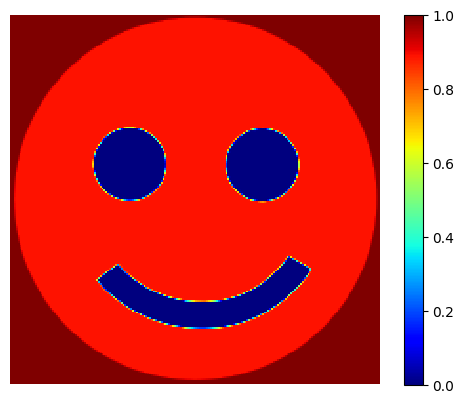

In [59]:
# load the pixel image!
face =imageio.imread('smiley.png')
pixel_image=transpose(face[:,:,0]) # have to transpose...
pixel_image=pixel_image[:,::-1] # and flip... to get the right view!
pixel_image-=pixel_image.min()
pixel_image=(pixel_image.astype(dtype='float'))/pixel_image.max() # normalize between 0 and 1!
Npixels=shape(pixel_image)[0] # assuming a square image!
# the function we want to have (desired outcome)
# this picks the pixels from the image
def myFunc(x0,x1):
    global pixel_image, Npixels
    # convert to integer coordinates (assuming input is 0..1)
    x0int=(x0*Npixels*0.9999).astype(dtype='int')
    x1int=(x1*Npixels*0.9999).astype(dtype='int')
    return(pixel_image[x0int,x1int]) # extract color values at these pixels
# check that this works:
Npixels_Test=Npixels # do the test output on a low-res grid! (saves time)
xrange=linspace(0,1,Npixels_Test)
X0,X1=meshgrid(xrange,xrange)
plt.imshow(myFunc(X0,X1),cmap='jet',interpolation='nearest',origin='lower')
plt.axis('off')
plt.colorbar()
plt.show()


In [60]:
# pick 'batchsize' random positions in the 2D square
def make_batch():
    global batchsize

    inputs=random.uniform(low=0,high=1,size=[batchsize,2])
    targets=zeros([batchsize,1]) # must have right dimensions
    targets[:,0]=myFunc(inputs[:,0],inputs[:,1])
    return(inputs,targets)


# test sample
Npixels_Test=Npixels # do the test output on a low-res grid! (saves time)
xrange=linspace(0,1,Npixels_Test)
X0,X1=meshgrid(xrange,xrange)
test_batchsize=shape(X0)[0]*shape(X0)[1]
testsample=zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

In [61]:
modelo = km.Sequential()
modelo.add(kl.Dense(150,input_shape=(2,),activation='relu' ) )
modelo.add(kl.Dense(150,activation='relu' ) )
modelo.add(kl.Dense(100,activation='relu' ) )
modelo.add(kl.Dense(1  ,activation='relu' ) )
modelo.compile( loss='mean_squared_error',
                optimizer=optimizers.SGD(learning_rate=0.1),
                metrics=['accuracy'])

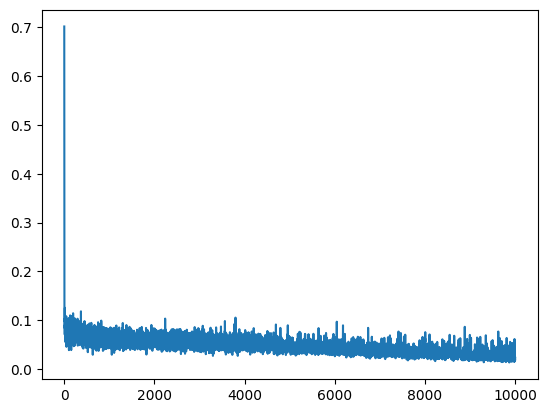

In [62]:
batchsize =200
batches = 10000
costs = np.zeros(batches)

for k in range(batches):
  y_in, y_target =  make_batch()  # y_in[batch x 2]   y_target[batch x 1]
  costs[k] = modelo.train_on_batch(y_in,y_target)[0]
plt.plot(costs)
plt.show()

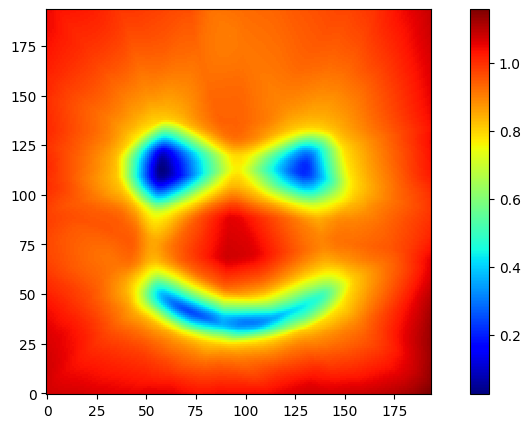

In [63]:
y_out =  modelo.predict_on_batch(testsample)
fig = plt.subplots(figsize=(10,5))
plt.imshow(reshape(y_out,shape(X0)),cmap='jet',origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

#### Random image 1

C:\Users\Oibug\AppData\Local\Temp\ipykernel_11412\2971932689.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread('22.png')


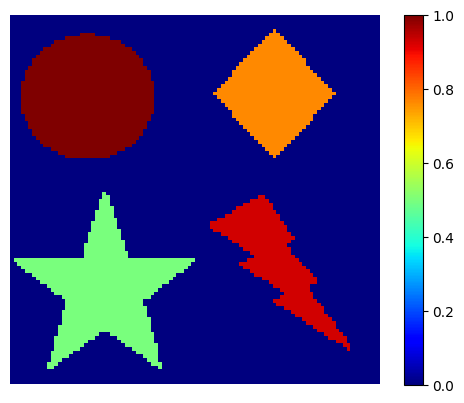

In [77]:
# load the pixel image!
face = imageio.imread('22.png')
pixel_image = transpose(face[:,:,0]) # have to transpose...
pixel_image = pixel_image[:,::-1] # and flip... to get the right view!
pixel_image -= pixel_image.min()
pixel_image = (pixel_image.astype(dtype='float'))/pixel_image.max() # normalize between 0 and 1!
Npixels     = shape(pixel_image)[0] # assuming a square image!

def myFunc(x0,x1):
    global pixel_image, Npixels
   
    x0int = (x0*Npixels*0.9999).astype(dtype='int')
    x1int = (x1*Npixels*0.9999).astype(dtype='int')
    return(pixel_image[x0int,x1int]) 


Npixels_Test = 100 # do the test output on a low-res grid! (saves time)
xrange       = linspace(0,1,Npixels_Test)
X0,X1        = meshgrid(xrange,xrange)
plt.imshow(myFunc(X0,X1),cmap='jet',interpolation='nearest',origin='lower'); plt.axis('off'); plt.colorbar()
plt.show()

# test sample
Npixels_Test   = Npixels # do the test output on a low-res grid! (saves time)
xrange         = linspace(0,1,Npixels_Test)
X0,X1          = meshgrid(xrange,xrange)
test_batchsize = shape(X0)[0]*shape(X0)[1]
testsample     = zeros([test_batchsize,2])
testsample[:,0]= X0.flatten()
testsample[:,1]= X1.flatten()


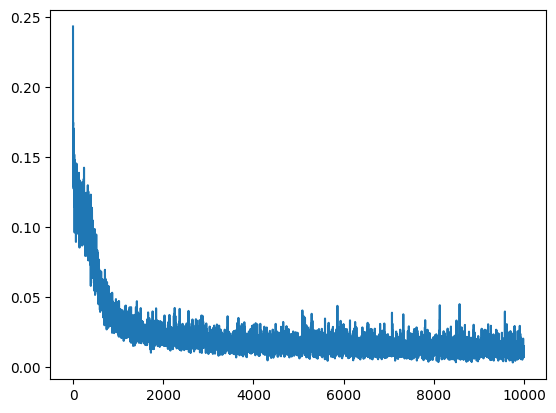

In [93]:
modelo = km.Sequential()
modelo.add(kl.Dense(150,input_shape=(2,),activation='relu' ) )
modelo.add(kl.Dense(150,activation='relu' ) )
modelo.add(kl.Dense(100,activation='relu' ) )
modelo.add(kl.Dense(1  ,activation='relu' ) )
modelo.compile( loss='mean_squared_error',
                optimizer = optimizers.Adam(),
                metrics=['accuracy'])

#from sklearn.model_selection import GridSearchCV

#lf = GridSearchCV(svc, parameters)


batchsize = 200
batches   = 10000
costs     = np.zeros(batches)
for k in range(batches):
  y_in, y_target =  make_batch()  # y_in[batch x 2]   y_target[batch x 1]
  costs[k]       = modelo.train_on_batch(y_in,y_target)[0]
plt.plot(costs); plt.show()

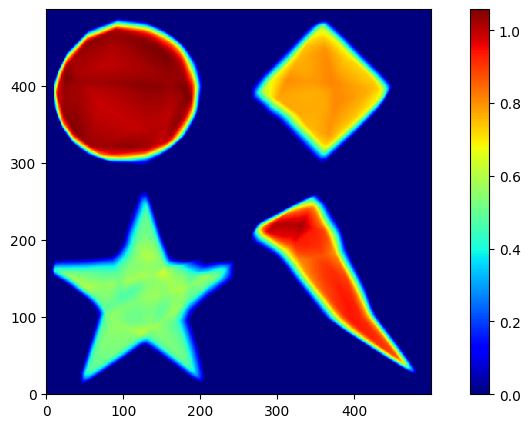

In [94]:
y_out =  modelo.predict_on_batch(testsample)
fig = plt.subplots(figsize=(10,5))
plt.imshow(reshape(y_out,shape(X0)),cmap='jet',origin='lower',interpolation='nearest')
plt.colorbar()
plt.show()

### Gaussian Beam

#### Criando a  imagem

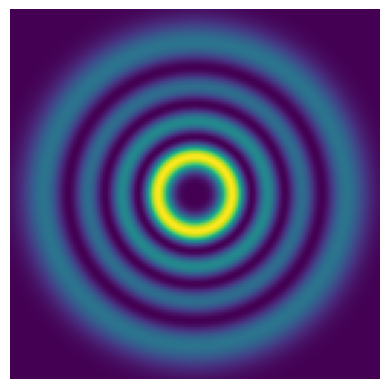

In [2]:
def myFunc2(x0,x1):
  P = 3
  L = 3
  
  # Parâmetros do feixe TGSM
  lambd = 780*nm        # light wavelength
  sigma = .1*mm         # largura
  delta = .03*mm         # comprimento de coerência
  mu    = .001/mm         # fator de twist
  n     = 2**7
  dx    = 4*um  

  xx   = x0*dx
  yy   = x1*dx
  
  k = 2*np.pi/lambd
  a = 1/(4*sigma**2) # [L]^-2
  b = 1/(2*delta**2) # [L]^-2
  t = np.sqrt(abs((b+k*mu/2)/(b-k*mu/2))) # # no unit, always positive
  auxNum = np.sqrt(4*a**2+8*a*b+(k*mu)**2) # [L]^-2, always positive
  w0 = np.sqrt(2/auxNum) # [L], always positive
  chi = ((2*a+2*b-auxNum)/(2*a+2*b+auxNum)) # no unit, always positive??
  
  z_R  = np.pi*w0**2/lambd  
  r    = np.sqrt(xx**2+yy**2)                                                 
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))
  PL   = scipy.special.assoc_laguerre(2*r**2/w0**2,P,abs(L))

  Fase = np.exp(- 1j*L*np.arctan2(yy,xx) )
  LG   = C*1/w0*(r*np.sqrt(2)/w0)**abs(L)*PL*np.exp( -r**2/w0**2)*Fase
  I_LG = abs(LG)**2
  I_LG = I_LG/I_LG.max()  
  return(I_LG )

xrange       = linspace(-64,64,2**7)
X0,X1        = meshgrid(xrange,xrange)
A = myFunc2(X0,X1)
plt.imshow(A);plt.axis('off');
#plt.colorbar()
matplotlib.image.imsave('Gaussian2.png', A)
plt.show()

#### ML

Dimensão da imagem: (128, 128)


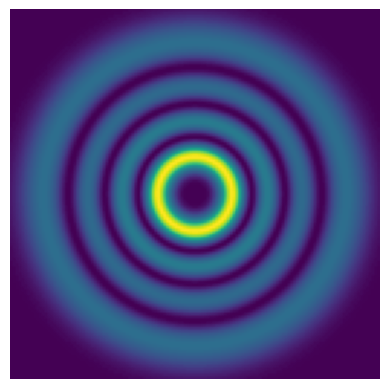

In [3]:
imga = Image.open('Gaussian2.png')  # abrindo a imagem 
imga = imga.convert('L')            # convertenco em cinza
pixel_image = np.array(imga)        # convertenco em números
pixel_image = pixel_image/pixel_image.max() # Normalizando 
Npixels     = shape(pixel_image) # assuming a square image!
print("Dimensão da imagem:",Npixels)
plt.imshow(pixel_image); 
plt.axis('off') #plt.colorbar();
plt.show()

In [4]:
# load the pixel image!
Npixels     = shape(pixel_image)[0] # assuming a square image!
def myFunc(x0,x1):
    global pixel_image, Npixels
   
    x0int = (x0*Npixels*0.9999).astype(dtype='int')
    x1int = (x1*Npixels*0.9999).astype(dtype='int')
    return(pixel_image[x0int,x1int]) 
def make_batch():
    global batchsize

    inputs=random.uniform(low=0,high=1,size=[batchsize,2])
    targets=zeros([batchsize,1]) # must have right dimensions
    targets[:,0]=myFunc(inputs[:,0],inputs[:,1])
    return(inputs,targets)

# test sample
Npixels_Test   = Npixels # do the test output on a low-res grid! (saves time)
xrange         = linspace(0,1,Npixels_Test)
X0,X1          = meshgrid(xrange,xrange)
test_batchsize = shape(X0)[0]*shape(X0)[1]
testsample     = zeros([test_batchsize,2])
testsample[:,0]= X0.flatten()
testsample[:,1]= X1.flatten()
print('test_batchsize:',test_batchsize)

test_batchsize: 16384


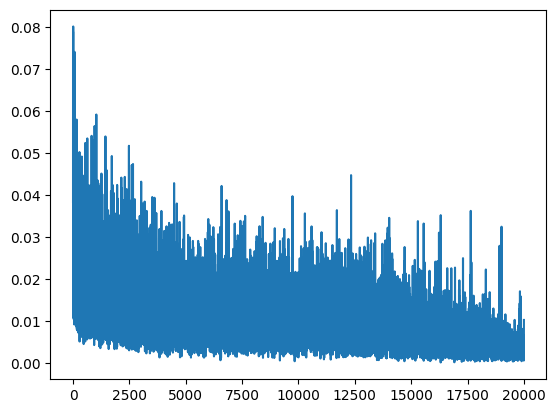

In [80]:
modelo = km.Sequential()
modelo.add(kl.Dense(500,input_shape=(2,),activation='relu' ) )
modelo.add(kl.Dense(25 ,activation='relu' ) )
modelo.add(kl.Dense(100,activation='relu') )
modelo.add(kl.Dense(1  ,activation='sigmoid' ) )
modelo.compile( loss='mean_squared_error',
                optimizer = optimizers.Adam(),
                metrics=['accuracy'])


batchsize = 20
batches   = 20000
costs     = np.zeros(batches)
Bactch_yin = []
Bactch_yout = []
for k in range(batches):
  y_in, y_target = make_batch()  # y_in[batch x 2]   y_target[batch x 1]
  Bactch_yin.append(y_in)
  Bactch_yout.append(y_target)
  
  costs[k]       = modelo.train_on_batch(y_in,y_target)[0]
plt.plot(costs); plt.show()

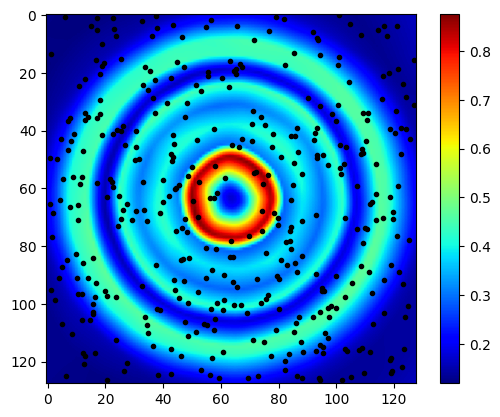

In [81]:
test_batchsize = shape(X0)[0]*shape(X0)[1]
testsample     = zeros([test_batchsize,2])
testsample[:,0]= X0.flatten()
testsample[:,1]= X1.flatten()

y_out =  modelo.predict_on_batch(testsample)

plt.imshow(reshape(y_out,shape(X0)),cmap='jet')
for j in range(len(Bactch_yin[0])):
    for i in range(len(Bactch_yin[0][:,0])):
        plt.plot(Bactch_yin[j][i,0]*127,Bactch_yin[j][i,1]*127,"k.")
plt.colorbar()
plt.show()

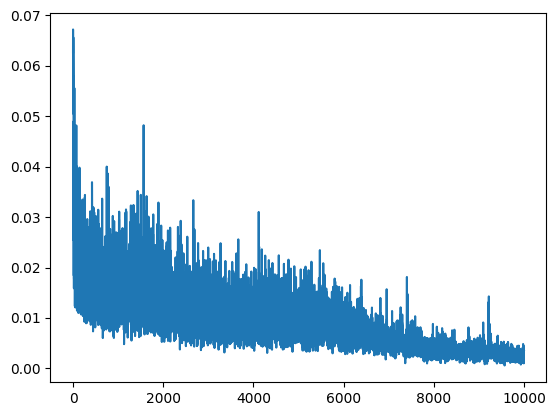

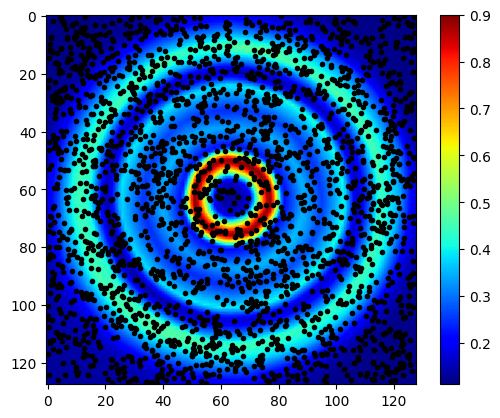

In [76]:
modelo = km.Sequential()
modelo.add(kl.Dense(500,input_shape=(2,),activation='relu' ) )
modelo.add(kl.Dense(25 ,activation='relu' ) )
modelo.add(kl.Dense(100,activation='relu') )
modelo.add(kl.Dense(1  ,activation='sigmoid' ) )
modelo.compile( loss='mean_squared_error',
                optimizer = optimizers.Adam(),
                metrics=['accuracy'])


batchsize = 50
batches   = 10000
costs     = np.zeros(batches)
Bactch_yin = []
Bactch_yout = []
for k in range(batches):
  y_in, y_target = make_batch()  # y_in[batch x 2]   y_target[batch x 1]
  Bactch_yin.append(y_in)
  Bactch_yout.append(y_target)
  
  costs[k]       = modelo.train_on_batch(y_in,y_target)[0]
plt.plot(costs); plt.show()

test_batchsize = shape(X0)[0]*shape(X0)[1]
testsample     = zeros([test_batchsize,2])
testsample[:,0]= X0.flatten()
testsample[:,1]= X1.flatten()

y_out =  modelo.predict_on_batch(testsample)

plt.imshow(reshape(y_out,shape(X0)),cmap='jet')
for j in range(len(Bactch_yin[0])):
    for i in range(len(Bactch_yin[0][:,0])):
        plt.plot(Bactch_yin[j][i,0]*127,Bactch_yin[j][i,1]*127,"k.")
plt.colorbar()
plt.show()

#### Fazendo de forma dinamica 

In [27]:
imga = Image.open('Gaussian2.png')  # abrindo a imagem 
imga = imga.convert('L')            # convertenco em cinza
pixel_image = np.array(imga)        # convertenco em números
pixel_image = pixel_image/pixel_image.max() # Normalizando 
Npixels     = shape(pixel_image)[0] # assuming a square image!

# load the pixel image!
def myFunc(x0,x1):
    global pixel_image, Npixels
   
    x0int = (x0*Npixels*0.9999).astype(dtype='int')
    x1int = (x1*Npixels*0.9999).astype(dtype='int')
    return(pixel_image[x0int,x1int]) 
def make_batch():
    global batchsize

    inputs=random.uniform(low=0,high=1,size=[batchsize,2])
    targets=zeros([batchsize,1]) # must have right dimensions
    targets[:,0]=myFunc(inputs[:,0],inputs[:,1])
    return(inputs,targets)

#--------------------------------------------------------------#
# test sample
Npixels_Test   = Npixels # do the test output on a low-res grid! (saves time)
xrange         = linspace(0,1,Npixels_Test)
X0,X1          = meshgrid(xrange,xrange)
test_batchsize = shape(X0)[0]*shape(X0)[1]
testsample     = zeros([test_batchsize,2])
testsample[:,0]= X0.flatten()
testsample[:,1]= X1.flatten()

#--------------------------------------------------------------#
modelo = km.Sequential()
modelo.add(kl.Dense(500,input_shape=(2,),activation='relu' ) )
modelo.add(kl.Dense(25 ,activation='relu' ) )
modelo.add(kl.Dense(100,activation='relu') )
modelo.add(kl.Dense(1  ,activation='sigmoid' ) )
modelo.compile( loss='mean_squared_error',
                optimizer = optimizers.Adam(),
                metrics=['accuracy'])


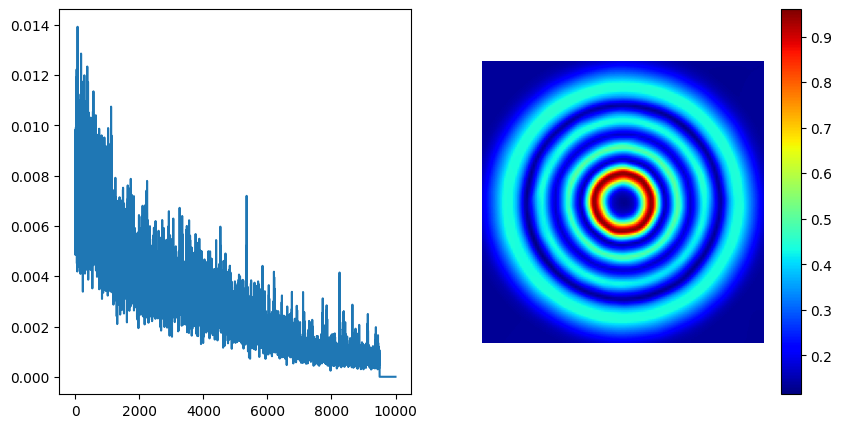

In [29]:
# parameters
nsteps      = 10000
nskip_steps = 500
batchsize   = 100

samples_count = 0
costs = zeros(nsteps)

for j in range(nsteps):
    y_in,y_target  = make_batch()
    costs[j]       = modelo.train_on_batch(y_in,y_target)[0]
    samples_count  += batchsize
    y_out          =  modelo.predict_on_batch(testsample) 
    if j%nskip_steps==0: # time to plot again!
        clear_output(wait=True)
        fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
        img=ax[1].imshow(reshape(y_out,shape(X0)),cmap='jet')
        fig.colorbar(img,ax=ax[1])
        ax[1].axis('off') # no axes
        ax[0].plot(costs)
        
        plt.show()